The Data Set ( 10 Samples) X:
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y:
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Jitter (10 Samples) X :
 [-3.04095252 -3.08116914 -2.83411619 -2.97093009 -2.81001416 -2.89374864
 -2.91964505 -3.02607593 -2.9577332 ]
 Xo Domain Space(10 Samples):
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


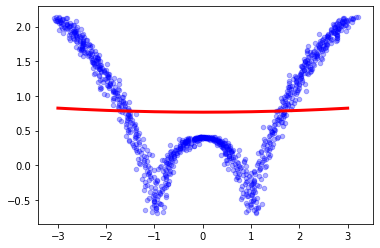

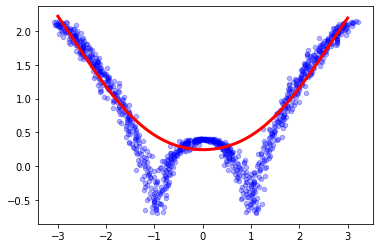

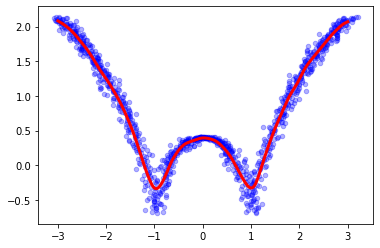

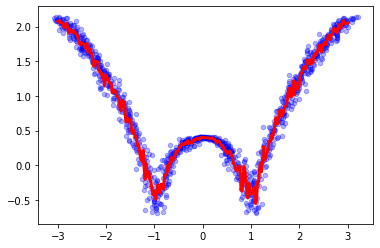

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau)) 
# Weight or Radial Kernel Bias Function
def local_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]  # Add one to avoid the loss in information
    X = np.c_[np.ones(len(X)), X]

    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau)  # XTranspose * W

    beta = np.linalg.pinv(xw @ X) @ xw @ Y  # @ Matrix Multiplication or Dot Product

    # predict value
    return x0 @ beta  # @ Matrix Multiplication or Dot Product for prediction


n = 1000
# Generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X:\n", X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y:\n", Y[1:10])
# Jitter X
X += np.random.normal(scale=.1, size=n)
print("Jitter (10 Samples) X :\n", X[1:10])

domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples):\n", domain[1:10])


def plot_lwr(tau):
    # Prediction through regression
    predictions = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.scatter(X, Y, color='blue', alpha=0.3, s=20)
    plt.plot(domain, predictions, color='red', linewidth=3)
    plt.show()


# Plotting the curves with different tau
plot_lwr(10.)
plot_lwr(1.)
plot_lwr(0.1)
plot_lwr(0.01)
